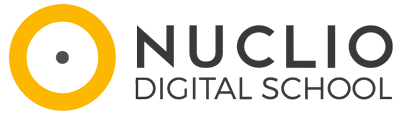


# **Modulo 4. Análisis de datos - Proyecto final**



# **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024

      **Importante:** Se deberá incluir al menos un año adicional de información


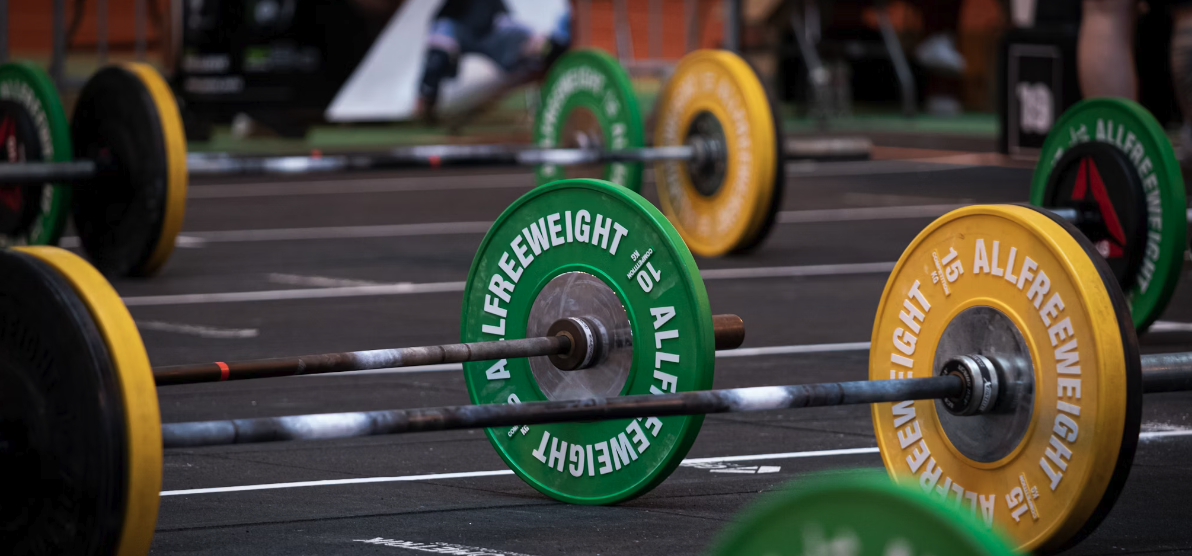

# **Parte 1.** Disponemos de la información

## Paso 1. Importar librerías

In [239]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import missingno as msno

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

import os   
import re

## Paso 2. Cargar datos

In [240]:
path = 'MODULO_4_DATA_ANALYSIS/DATA/'

# Obtenemos la lista de ficheros en el directorio especificado
ficheros = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]

# Filtramos y ordenamos los ficheros para que los de 2019 se lean primero y luego los de 2020
ficheros = sorted(ficheros, key=lambda x: ('2020' in x, '2019' not in x))

# Creamos un diccionario para almacenar los datos
dict_datos = {}

# Iteramos sobre cada fichero en la lista
for file in ficheros:
    # Verificamos si el fichero tiene una extensión .csv o .xlsx
    if file.endswith(('.csv', '.xlsx')):
        print(file)  # Imprimimos el nombre del fichero
        # Leemos el fichero según su extensión y lo almacenamos en el diccionario
        if file.endswith('.csv'):
            df = pd.read_csv(path + file)
        else:
            df = pd.read_excel(path + file)
        dict_datos[file] = df  # Guardamos el DataFrame en el diccionario

Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv
Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv


## Paso 3. Exploración inicial

Definimos una función para explorar los DF

In [241]:
def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include = 'all').fillna(''))
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')

## Ejecutamos la función con un Bucle For para iterear por los datos guardados en el diccionario

In [244]:
#exploracion_inicial(df, 'version_lite')
for k, v in dict_datos.items():
    print('_____________________________________________________________')
    print(k)
    print('_____________________________________________________________')
    exploracion_inicial(v, 'version_lite')


_____________________________________________________________
Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv
_____________________________________________________________
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 20 filas y 6 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


Eventos  ...     Genero
0  55 kg (06.04)  ...  Masculino
1  61 kg (07.04)  ...  Masculino

[2 rows x 6 columns]


<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
_____________________________________________________________
Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv
_____________________________________________________________
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 20 filas y 6 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


Eventos                                           Oro  ...   Año     Genero
0  55 kg (04.04)  Anguel Rusev Bulgaria  111 + 147 = 258[n 1]​  ...  2020  Masculino
1  61 kg (04.04)     Stilian Grozdev Bulgaria  136 + 160 = 296  ...  2020  Masculino

[2 rows x 6 columns]


<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## Paso 4. Crear un único dataframe con los datos de 2019 y 2020

In [246]:
# Fusionamos los dataframes del diccionario dict_datos
df_fusionado = pd.concat(dict_datos.values(), ignore_index=True)
df_fusionado

Eventos  ...     Genero
0         55 kg (06.04)  ...  Masculino
1         61 kg (07.04)  ...  Masculino
2         67 kg (08.04)  ...  Masculino
3         73 kg (09.04)  ...  Masculino
4         81 kg (10.04)  ...  Masculino
5         89 kg (11.04)  ...  Masculino
6         96 kg (12.04)  ...  Masculino
7        102 kg (13.04)  ...  Masculino
8        109 kg (13.04)  ...  Masculino
9       +109 kg (13.04)  ...  Masculino
10        45 kg (06.04)  ...   Femenino
11        49 kg (06.04)  ...   Femenino
12        55 kg (07.04)  ...   Femenino
13        59 kg (08.04)  ...   Femenino
14        64 kg (09.04)  ...   Femenino
15        71 kg (10.04)  ...   Femenino
16        76 kg (11.04)  ...   Femenino
17  81 kg[n 2]​ (12.04)  ...   Femenino
18        87 kg (12.04)  ...   Femenino
19       +87 kg (13.04)  ...   Femenino
20        55 kg (04.04)  ...  Masculino
21        61 kg (04.04)  ...  Masculino
22        67 kg (05.04)  ...  Masculino
23        73 kg (06.04)  ...  Masculino
24        81 kg (07.04)  ...  Masculino
25        89 kg (08.04)  ...  Masculino
26        96 kg (09.04)  ...  Masculino
27       102 kg (10.04)  ...  Masculino
28       109 kg (10.04)  ...  Masculino
29      +109 kg (11.04)  ...  Masculino
30        45 kg (03.04)  ...   Femenino
31        49 kg (03.04)  ...   Femenino
32        55 kg (04.04)  ...   Femenino
33        59 kg (05.04)  ...   Femenino
34        64 kg (06.04)  ...   Femenino
35        71 kg (07.04)  ...   Femenino
36        76 kg (08.04)  ...   Femenino
37        81 kg (09.04)  ...   Femenino
38        87 kg (10.04)  ...   Femenino
39       +87 kg (11.04)  ...   Femenino

[40 rows x 6 columns]

## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [247]:
# Transformarmos el DataFrame df_fusionado para tener las columnas requeridas
df_transformado = pd.melt(df_fusionado, 
                          id_vars=["Eventos", "Año", "Genero"], 
                          value_vars=["Oro", "Plata", "Bronce"], 
                          var_name="Medalla", 
                          value_name="Atleta")

# Reordenamos las columnas según el formato final requerido
df_transformado = df_transformado[["Eventos", "Año", "Genero", "Medalla", "Atleta"]]

df_transformado

Eventos  ...                                          Atleta
0     55 kg (06.04)  ...  Mirco Scarantino Italia  116 + 145 = 261[n 1]​
1     61 kg (07.04)  ...     Henadz Laptseu Bielorrusia  133 + 153 = 286
2     67 kg (08.04)  ...        Bernardin Matam Francia  137 + 175 = 312
3     73 kg (09.04)  ...      Bozhidar Andreev Bulgaria  153 + 192 = 345
4     81 kg (10.04)  ...      Antonino Pizzolato Italia  155 + 201 = 356
..              ...  ...                                             ...
115   71 kg (07.04)  ...            Raluca Olaru Rumania  98 + 120 = 218
116   76 kg (08.04)  ...      Anastasiya Romanova Rusia  111 + 132 = 243
117   81 kg (09.04)  ...       Liana Guiurdzhian Armenia  98 + 129 = 227
118   87 kg (10.04)  ...          Daria Riazanova Rusia  105 + 135 = 240
119  +87 kg (11.04)  ...           Melike Günal Turquía  108 + 135 = 243

[120 rows x 5 columns]

## Me he dado cuenta que en el webscrapping tendre muchos nombres compuesto lo ideal es encontrar una manera de lidiar con ellos de manera automatica.

In [248]:
# Eliminamos los '+' de la columna 'Eventos' en el DataFrame df_transformado
df_transformado['Eventos'] = df_transformado['Eventos'].str.replace('+', '', regex=False)

df_transformado

Eventos  ...                                          Atleta
0    55 kg (06.04)  ...  Mirco Scarantino Italia  116 + 145 = 261[n 1]​
1    61 kg (07.04)  ...     Henadz Laptseu Bielorrusia  133 + 153 = 286
2    67 kg (08.04)  ...        Bernardin Matam Francia  137 + 175 = 312
3    73 kg (09.04)  ...      Bozhidar Andreev Bulgaria  153 + 192 = 345
4    81 kg (10.04)  ...      Antonino Pizzolato Italia  155 + 201 = 356
..             ...  ...                                             ...
115  71 kg (07.04)  ...            Raluca Olaru Rumania  98 + 120 = 218
116  76 kg (08.04)  ...      Anastasiya Romanova Rusia  111 + 132 = 243
117  81 kg (09.04)  ...       Liana Guiurdzhian Armenia  98 + 129 = 227
118  87 kg (10.04)  ...          Daria Riazanova Rusia  105 + 135 = 240
119  87 kg (11.04)  ...           Melike Günal Turquía  108 + 135 = 243

[120 rows x 5 columns]

In [249]:
# Eliminamos los [n1],[n 2] de todas las columnas del DataFrame df_transformado
df_transformado = df_transformado.apply(lambda x: x.str.replace(r'\[.*?\]', '', regex=True) if x.dtype == "object" else x)

df_transformado

Eventos   Año  ... Medalla                                       Atleta
0    55 kg (06.04)  2019  ...     Oro    Mirco Scarantino Italia  116 + 145 = 261​
1    61 kg (07.04)  2019  ...     Oro  Henadz Laptseu Bielorrusia  133 + 153 = 286
2    67 kg (08.04)  2019  ...     Oro     Bernardin Matam Francia  137 + 175 = 312
3    73 kg (09.04)  2019  ...     Oro   Bozhidar Andreev Bulgaria  153 + 192 = 345
4    81 kg (10.04)  2019  ...     Oro   Antonino Pizzolato Italia  155 + 201 = 356
..             ...   ...  ...     ...                                          ...
115  71 kg (07.04)  2020  ...  Bronce         Raluca Olaru Rumania  98 + 120 = 218
116  76 kg (08.04)  2020  ...  Bronce   Anastasiya Romanova Rusia  111 + 132 = 243
117  81 kg (09.04)  2020  ...  Bronce    Liana Guiurdzhian Armenia  98 + 129 = 227
118  87 kg (10.04)  2020  ...  Bronce       Daria Riazanova Rusia  105 + 135 = 240
119  87 kg (11.04)  2020  ...  Bronce        Melike Günal Turquía  108 + 135 = 243

[120 rows x 5 columns]

In [228]:
print(df_transformado['Atleta'])

0        Mirco Scarantino Italia  116 + 145 = 261​
1      Henadz Laptseu Bielorrusia  133 + 153 = 286
2         Bernardin Matam Francia  137 + 175 = 312
3       Bozhidar Andreev Bulgaria  153 + 192 = 345
4       Antonino Pizzolato Italia  155 + 201 = 356
                          ...                     
115           Raluca Olaru Rumania  98 + 120 = 218
116     Anastasiya Romanova Rusia  111 + 132 = 243
117      Liana Guiurdzhian Armenia  98 + 129 = 227
118         Daria Riazanova Rusia  105 + 135 = 240
119          Melike Günal Turquía  108 + 135 = 243
Name: Atleta, Length: 120, dtype: object


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

## Vamos a crear Nombre, Apellido, País, Arranca, Dos tiempos y Total de la columna 'Atleta'

## Vamos a crear la columna resultados como un paso intermedio para separar toda la información de Atletas

In [250]:
# Extraemos los valores numéricos de la columna 'Atleta' y los asignamos a la nueva columna 'Resultados'
df_transformado['Resultados'] = df_transformado['Atleta'].str.extractall(r'(\d+)').unstack().fillna('').apply(lambda x: ' '.join(x), axis=1)

# Eliminamos los valores numéricos y los signos + = de la columna 'Atleta'
df_transformado['Atleta'] = df_transformado['Atleta'].str.replace(r'[\d+=+]', '', regex=True).str.strip()

df_transformado

Eventos   Año  ...                          Atleta   Resultados
0    55 kg (06.04)  2019  ...  Mirco Scarantino Italia      ​  116 145 261
1    61 kg (07.04)  2019  ...      Henadz Laptseu Bielorrusia  133 153 286
2    67 kg (08.04)  2019  ...         Bernardin Matam Francia  137 175 312
3    73 kg (09.04)  2019  ...       Bozhidar Andreev Bulgaria  153 192 345
4    81 kg (10.04)  2019  ...       Antonino Pizzolato Italia  155 201 356
..             ...   ...  ...                             ...          ...
115  71 kg (07.04)  2020  ...            Raluca Olaru Rumania   98 120 218
116  76 kg (08.04)  2020  ...       Anastasiya Romanova Rusia  111 132 243
117  81 kg (09.04)  2020  ...       Liana Guiurdzhian Armenia   98 129 227
118  87 kg (10.04)  2020  ...           Daria Riazanova Rusia  105 135 240
119  87 kg (11.04)  2020  ...            Melike Günal Turquía  108 135 243

[120 rows x 6 columns]

In [251]:
# Primero, dividimos la columna 'Resultados' en tres nuevas columnas
df_transformado[['Arrancada', 'Dos tiempos', 'Total']] = df_transformado['Resultados'].str.split(expand=True)

# Convertimos las nuevas columnas a tipo numérico
df_transformado['Arrancada'] = pd.to_numeric(df_transformado['Arrancada'], errors='coerce')
df_transformado['Dos tiempos'] = pd.to_numeric(df_transformado['Dos tiempos'], errors='coerce')
df_transformado['Total'] = pd.to_numeric(df_transformado['Total'], errors='coerce')

# Eliminamos la columna 'Resultados'
df_transformado.drop(columns=['Resultados'], inplace=True)

df_transformado

Eventos   Año     Genero  ... Arrancada Dos tiempos  Total
0    55 kg (06.04)  2019  Masculino  ...       116         145    261
1    61 kg (07.04)  2019  Masculino  ...       133         153    286
2    67 kg (08.04)  2019  Masculino  ...       137         175    312
3    73 kg (09.04)  2019  Masculino  ...       153         192    345
4    81 kg (10.04)  2019  Masculino  ...       155         201    356
..             ...   ...        ...  ...       ...         ...    ...
115  71 kg (07.04)  2020   Femenino  ...        98         120    218
116  76 kg (08.04)  2020   Femenino  ...       111         132    243
117  81 kg (09.04)  2020   Femenino  ...        98         129    227
118  87 kg (10.04)  2020   Femenino  ...       105         135    240
119  87 kg (11.04)  2020   Femenino  ...       108         135    243

[120 rows x 8 columns]

In [181]:
df_transformado['Atleta']

0      Mirco Scarantino Italia      ​
1          Henadz Laptseu Bielorrusia
2             Bernardin Matam Francia
3           Bozhidar Andreev Bulgaria
4           Antonino Pizzolato Italia
                    ...              
115              Raluca Olaru Rumania
116         Anastasiya Romanova Rusia
117         Liana Guiurdzhian Armenia
118             Daria Riazanova Rusia
119              Melike Günal Turquía
Name: Atleta, Length: 120, dtype: object

In [182]:
# Lista de países europeos (con nombres compuestos correctamente incluidos)
#paises_europeos = [
  #  "Albania", "Alemania", "Andorra", "Armenia", "Austria", "Azerbaiyan", "Bélgica", "Bielorrusia", "Bosnia y Herzegovina",
 #   "Bulgaria", "Chipre", "Croacia", "Dinamarca", "Eslovaquia", "Eslovenia", "España", "Estonia", "Finlandia", "Francia",
#    "Georgia", "Grecia", "Hungría", "Irlanda", "Islandia", "Italia", "Kazajistan", "Kosovo", "Letonia", "Liechtenstein",
 #   "Lituania", "Luxemburgo", "Malta", "Moldavia", "Mónaco", "Montenegro", "Noruega", "Países Bajos", "Polonia", "Portugal",
 #   "República Checa", "Rumania", "Rusia", "San Marino", "Serbia", "Suecia", "Suiza", "Tajikistan", "Turquía", "Ucrania", 
 #   "Uzbekistán", "Vaticano", "Kosovo", "Macedonia", "Mónaco", "Reino Unido", "Países Bajos"
#]

#def separar_atleta(atleta):
    # Limpiar y normalizar los caracteres de entrada para evitar problemas con caracteres especiales
 #   atleta = atleta.strip()
    
    # Primero, separamos la cadena en partes por espacios y limpiamos espacios extras
 #   parts = [part.strip() for part in atleta.split()]
    
 #   pais = None
 #   nombre_apellidos = ""
    
    # Verificamos si el último término o las últimas palabras son un país
#    for i in range(len(parts), 0, -1):
 #       posible_pais = " ".join(parts[i-1:])
  #      if posible_pais in paises_europeos:
       #     pais = posible_pais
      #      nombre_apellidos = " ".join(parts[:i-1])  # El resto son el nombre y apellidos
      #      break  # Si encontramos el país, salimos del loop
    
  #  if not pais:
        # Si no encontramos país, lo tratamos como todo nombre y apellido
   #     nombre_apellidos = " ".join(parts)
    
    # Ahora separando nombre y apellidos
  #  nombre_apellidos = nombre_apellidos.split()
  #  nombre = nombre_apellidos[0]  # La primera palabra es el nombre
 #   apellidos = " ".join(nombre_apellidos[1:])  # El resto son los apellidos
    
 #   return nombre, apellidos, pais

me da errores con algunos nombres 

## lo haremos con una función con condiciones mas simples, aunque eso significa que en el web scrapping tocara localizar todos los apellidos, ya que el unico pais europeo compuesto es Reino Unido

In [183]:
# Función para dividir la columna 'Atleta' en varias columnas nuevas con condiciones específicas
#def dividir_atleta(atleta):
 #   partes = atleta.split()
    #Nombre = partes[0]
    #Apellido = partes[1]
    #Pais = ' '.join(partes[2:])
    
    # Condición específica para 'Reino Unido'
  #  if 'Reino Unido' in atleta:
    #    Pais = 'Reino Unido'
    #    Apellido = ' '.join(partes[1:3]).replace('Reino', '').strip()
    
    # Condición específica para 'Anna Van Bellinghen'
  #  if 'Anna Van Bellinghen' in atleta:
    #    Nombre = 'Anna'
    #    Apellido = 'Van Bellinghen'
     #   Pais = ' '.join(partes[3:])
    
   # return pd.Series([Nombre, Apellido, Pais])

# Aplicamos la función a la columna 'Atleta' y creamos nuevas columnas
#df_transformado[['Nombre', 'Apellido', 'Pais']] = df_transformado['Atleta'].apply(dividir_atleta)

# Eliminamos la columna 'Atleta' ya que ahora tenemos las columnas separadas
#df_transformado.drop(columns=['Atleta'], inplace=True)

#df_transformado

## Puedo solucionarlo así pero solo sirve para este caso concreto, no puedo depender de soluciones puntuales.

## Vamos a probar separando primero los paises

In [184]:
# Añadir un guion bajo (_) entre cada palabra de cada cadena en la columna 'Atleta'
# y asegurarse de no duplicar guiones bajos existentes, y no añadir un guion bajo al final
#def add_underscore(name):
  #  return '_'.join(name.split())

#df_transformado['Atleta'] = df_transformado['Atleta'].apply(add_underscore)
#df_transformado['Atleta']

## He detectado que existe algun caracter invisible en algunas cadenas de texto de Atleta. Seguramente eso era lo que me provocaba el error

In [252]:
# Eliminamos espacios al principio y al final de la cadena en la columna 'Atleta'
df_transformado['Atleta'] = df_transformado['Atleta'].str.strip()

def remove_underscore(name):
    # Elimina caracteres no imprimibles y los guiones bajos
    cleaned_name = re.sub(r'[^\x20-\x7E]', '', name)  # Elimina caracteres no ASCII imprimibles
    return ' '.join(cleaned_name.split('_'))

df_transformado['Atleta'] = df_transformado['Atleta'].apply(remove_underscore)
df_transformado

Eventos   Año     Genero  ... Arrancada Dos tiempos  Total
0    55 kg (06.04)  2019  Masculino  ...       116         145    261
1    61 kg (07.04)  2019  Masculino  ...       133         153    286
2    67 kg (08.04)  2019  Masculino  ...       137         175    312
3    73 kg (09.04)  2019  Masculino  ...       153         192    345
4    81 kg (10.04)  2019  Masculino  ...       155         201    356
..             ...   ...        ...  ...       ...         ...    ...
115  71 kg (07.04)  2020   Femenino  ...        98         120    218
116  76 kg (08.04)  2020   Femenino  ...       111         132    243
117  81 kg (09.04)  2020   Femenino  ...        98         129    227
118  87 kg (10.04)  2020   Femenino  ...       105         135    240
119  87 kg (11.04)  2020   Femenino  ...       108         135    243

[120 rows x 8 columns]

### He conseguido eliminar ese ente invisible y porfin puedo extraer el páis

In [253]:
# Función para extraer el país del nombre del atleta y eliminarlo del nombre
def extraer_y_eliminar_pais(atleta):
    palabras = atleta.split()
    if len(palabras) > 1 and palabras[-2] == 'Reino' and palabras[-1] == 'Unido':
        pais = 'Reino Unido'
        nombre = ' '.join(palabras[:-2])
    else:
        pais = palabras[-1]
        nombre = ' '.join(palabras[:-1])
    return nombre, pais

# Aplicar la función y crear las nuevas columnas 'Atleta' y 'País' en el dataframe 'df_transformado'
df_transformado[['Atleta', 'País']] = df_transformado['Atleta'].apply(lambda x: pd.Series(extraer_y_eliminar_pais(x)))

df_transformado

Eventos   Año     Genero  ... Dos tiempos Total         País
0    55 kg (06.04)  2019  Masculino  ...         145   261       Italia
1    61 kg (07.04)  2019  Masculino  ...         153   286  Bielorrusia
2    67 kg (08.04)  2019  Masculino  ...         175   312      Francia
3    73 kg (09.04)  2019  Masculino  ...         192   345     Bulgaria
4    81 kg (10.04)  2019  Masculino  ...         201   356       Italia
..             ...   ...        ...  ...         ...   ...          ...
115  71 kg (07.04)  2020   Femenino  ...         120   218      Rumania
116  76 kg (08.04)  2020   Femenino  ...         132   243        Rusia
117  81 kg (09.04)  2020   Femenino  ...         129   227      Armenia
118  87 kg (10.04)  2020   Femenino  ...         135   240        Rusia
119  87 kg (11.04)  2020   Femenino  ...         135   243       Turqua

[120 rows x 9 columns]

In [254]:
# Función para separar el nombre y el apellido
def separar_nombre_apellido(atleta):
    partes = atleta.split()
    nombre = partes[0]
    apellido = ' '.join(partes[1:]) if len(partes) > 1 else ''
    return nombre, apellido

# Aplicar la función y crear las nuevas columnas 'Nombre' y 'Apellido' en el dataframe 'df_transformado'
df_transformado[['Nombre', 'Apellido']] = df_transformado['Atleta'].apply(lambda x: pd.Series(separar_nombre_apellido(x)))

# Eliminar la columna 'Atleta'
df_transformado = df_transformado.drop(columns=['Atleta'])

df_transformado

Eventos   Año     Genero  ...         País      Nombre     Apellido
0    55 kg (06.04)  2019  Masculino  ...       Italia       Mirco   Scarantino
1    61 kg (07.04)  2019  Masculino  ...  Bielorrusia      Henadz      Laptseu
2    67 kg (08.04)  2019  Masculino  ...      Francia   Bernardin        Matam
3    73 kg (09.04)  2019  Masculino  ...     Bulgaria    Bozhidar      Andreev
4    81 kg (10.04)  2019  Masculino  ...       Italia    Antonino    Pizzolato
..             ...   ...        ...  ...          ...         ...          ...
115  71 kg (07.04)  2020   Femenino  ...      Rumania      Raluca        Olaru
116  76 kg (08.04)  2020   Femenino  ...        Rusia  Anastasiya     Romanova
117  81 kg (09.04)  2020   Femenino  ...      Armenia       Liana  Guiurdzhian
118  87 kg (10.04)  2020   Femenino  ...        Rusia       Daria    Riazanova
119  87 kg (11.04)  2020   Femenino  ...       Turqua      Melike         Gnal

[120 rows x 10 columns]

## Vamos a crear Categoria y Fecha desde la columna Eventos y Año

In [255]:
df_transformado[['Categoría', 'Fecha']] = df_transformado.apply(
    lambda row: pd.Series([
        row['Eventos'].split(' (')[0].strip(),  # Categoría
        f"{row['Eventos'].split(' (')[1].strip(')')}.{row['Año']}"  # Fecha con año
    ]),
    axis=1
)

df_transformado.drop(columns=['Año', 'Eventos'], inplace=True)

In [189]:
df_transformado

Genero Medalla  Arrancada  ...     Apellido  Categoría       Fecha
0    Masculino     Oro        116  ...   Scarantino      55 kg  06.04.2019
1    Masculino     Oro        133  ...      Laptseu      61 kg  07.04.2019
2    Masculino     Oro        137  ...        Matam      67 kg  08.04.2019
3    Masculino     Oro        153  ...      Andreev      73 kg  09.04.2019
4    Masculino     Oro        155  ...    Pizzolato      81 kg  10.04.2019
..         ...     ...        ...  ...          ...        ...         ...
115   Femenino  Bronce         98  ...        Olaru      71 kg  07.04.2020
116   Femenino  Bronce        111  ...     Romanova      76 kg  08.04.2020
117   Femenino  Bronce         98  ...  Guiurdzhian      81 kg  09.04.2020
118   Femenino  Bronce        105  ...    Riazanova      87 kg  10.04.2020
119   Femenino  Bronce        108  ...         Gnal      87 kg  11.04.2020

[120 rows x 10 columns]

In [256]:
# Convertimos la columna 'Fecha' al tipo datetime64[ns] con el formato "%Y-%m-%d"
df_transformado['Fecha'] = pd.to_datetime(df_transformado['Fecha'], format="%d.%m.%Y", errors='coerce')

df_transformado['Fecha'].isnull().sum()

0

In [191]:
df_transformado.dtypes

Genero                 object
Medalla                object
Arrancada               int64
Dos tiempos             int64
Total                   int64
País                   object
Nombre                 object
Apellido               object
Categoría              object
Fecha          datetime64[ns]
dtype: object

## Paso 7. Filtrado de columnas y ordenación

In [257]:
# Reordenamos las columnas del dataframe 
columnas_finales = ['Genero', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']
df_final = df_transformado[columnas_finales]

df_final

Genero Categoría      Fecha  ... Arrancada Dos tiempos Total
0    Masculino     55 kg 2019-04-06  ...       116         145   261
1    Masculino     61 kg 2019-04-07  ...       133         153   286
2    Masculino     67 kg 2019-04-08  ...       137         175   312
3    Masculino     73 kg 2019-04-09  ...       153         192   345
4    Masculino     81 kg 2019-04-10  ...       155         201   356
..         ...       ...        ...  ...       ...         ...   ...
115   Femenino     71 kg 2020-04-07  ...        98         120   218
116   Femenino     76 kg 2020-04-08  ...       111         132   243
117   Femenino     81 kg 2020-04-09  ...        98         129   227
118   Femenino     87 kg 2020-04-10  ...       105         135   240
119   Femenino     87 kg 2020-04-11  ...       108         135   243

[120 rows x 10 columns]

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `object`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [258]:
# Convertimos las columnas al tipo de datos especificado
df_final['Medalla'] = df_final['Medalla'].astype('category')
df_final['Arrancada'] = df_final['Arrancada'].astype('int64')
df_final['Dos tiempos'] = df_final['Dos tiempos'].astype('int64')

# Aseguramos que la columna 'Total' sea de tipo string antes de limpiar
df_final['Total'] = df_final['Total'].astype(str)

# Limpiamos la columna 'Total' de caracteres no numéricos
df_final['Total'] = df_final['Total'].str.replace(r'\D', '', regex=True).astype('int64')

# Verificamos los tipos de datos
df_final.dtypes

Genero                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [271]:
# Información general del dataframe
df_final.info()

# Descripción estadística del dataframe
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       120 non-null    object        
 1   Categoría    120 non-null    object        
 2   Fecha        120 non-null    datetime64[ns]
 3   Medalla      120 non-null    category      
 4   Nombre       120 non-null    object        
 5   Apellido     120 non-null    object        
 6   País         120 non-null    object        
 7   Arrancada    120 non-null    int64         
 8   Dos tiempos  120 non-null    int64         
 9   Total        120 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 8.8+ KB


Fecha   Arrancada  Dos tiempos       Total
count                  120  120.000000   120.000000  120.000000
mean   2019-10-08 09:36:00  129.600000   157.391667  286.991667
min    2019-04-06 00:00:00   67.000000    81.000000  150.000000
25%    2019-04-10 00:00:00   99.500000   122.000000  221.750000
50%    2019-10-08 00:00:00  114.500000   145.000000  257.000000
75%    2020-04-07 00:00:00  163.250000   200.000000  366.000000
max    2020-04-11 00:00:00  222.000000   263.000000  485.000000
std                    NaN   38.603435    45.187061   83.566257

In [294]:
# Agrupamos y contamos las medallas por género, año y tipo de medalla
medallas_por_genero_año = df_final.copy()
medallas_por_genero_año['Año'] = medallas_por_genero_año['Fecha'].dt.year
medallas_por_genero_año = medallas_por_genero_año.groupby(['Genero', 'Año', 'Medalla'])['Medalla'].count().reset_index(name='Count')

# Crear el gráfico de barras con mejoras de visibilidad
fig = px.bar(medallas_por_genero_año, x='Año', y='Count', 
             title='Distribución de Medallas por Género, Año y Tipo de Medalla',
             labels={'Count': 'Número de Medallas', 'Año': 'Año'},
             color='Genero',
             barmode='group',
             facet_col='Medalla')

# Mejorar la visibilidad del gráfico
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Número de Medallas',
    title={'x':0.5, 'xanchor': 'center'},
    legend_title_text='Género',
    xaxis=dict(tickmode='linear', tick0=medallas_por_genero_anio['Año'].min(), dtick=1),
    yaxis=dict(tickmode='linear', tick0=0, dtick=1, showgrid=True, gridcolor='LightGray'),
    bargap=0.2,
    bargroupgap=0.1
)

# Mostrar el gráfico
fig.show()

No podemos sacar mucha información de este grafico, pero nos aseguramos que los datos estan parejos en cuanto a distribución de medallas

In [273]:
# Distribución de medallas por país
medallas_por_pais = df_final['País'].value_counts().head(10).reset_index()
medallas_por_pais.columns = ['País', 'Cantidad de Medallas']

fig = px.bar(medallas_por_pais, x='Cantidad de Medallas', y='País', 
             title='Top 10 Países con más Medallas', 
             labels={'Cantidad de Medallas': 'Cantidad de Medallas', 'País': 'País'},
             orientation='h', 
             color='País', 
             color_continuous_scale='viridis')

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

Parece que Rusia y los paises del este de Europa lideran este tipo de deporte

In [277]:
# Análisis de la relación entre el total levantado y el país 
top_paises = df_final['País'].value_counts().head(10).index
df_top_paises = df_final[df_final['País'].isin(top_paises)]

fig = px.box(df_top_paises, x='País', y='Total', color='Genero', 
             title='Relación entre el Total Levantado y el País por Género',
             labels={'País': 'País', 'Total': 'Total Levantado', 'Genero': 'Género'})

fig.update_layout(xaxis={'categoryorder':'total ascending'}, xaxis_tickangle=-45)

fig.show()

Con este gráfico podemos hacer un poco más de incapie en ese dominio de los paises del este que hemos comentado.

In [275]:
# Análisis de la relación entre el total levantado y el tipo de medalla 

# Ordenar las medallas
df_final['Medalla'] = pd.Categorical(df_final['Medalla'], categories=['Oro', 'Plata', 'Bronce'], ordered=True)

fig = px.box(df_final, x='Medalla', y='Total', color='Genero', 
             title='Relación entre el Total Levantado y el Tipo de Medalla por Género',
             labels={'Medalla': 'Tipo de Medalla', 'Total': 'Total Levantado', 'Genero': 'Género'})

fig.show()

Obviamente, físicamente el hombre está por encima de la mujer en levantamiento de peso. Pero existe un caso en las mujeres que es realmente increíble un Oro femenino en Rusia levantado 331Kg llegando a niveles de casi medias de Bronce en los hombres.

Por lo demás podemos observar que en las mujeres las diferencias entre los kg del Oro y las demás medallas son bastante pequeñas. En cambio en los hombres sí que vemos un aumento notable entre las marcas

In [278]:
# Gráfico de dispersión para comparar el rendimiento entre géneros en Arrancada, Dos tiempos y Total 

fig = px.scatter(df_final, x='Arrancada', y='Dos tiempos', color='Genero', size='Total',
                 title='Relación entre Arrancada, Dos tiempos y Total por Género',
                 labels={'Arrancada': 'Arrancada (kg)', 'Dos tiempos': 'Dos tiempos (kg)', 'Total': 'Total Levantado (kg)', 'Genero': 'Género'},
                 hover_data=['Nombre', 'Apellido', 'País'])

fig.show()

Podemos observar de una manera más visual como el caso de la Rusa Tatiana se cuela entre los hombres un hecho muy remarcable. Parece que además el máximo de Kg que las mujeres pueden levantar es de hecho el mínimo que demuestran levantar los hombres por norma general

In [293]:
# Filtrar los datos para los años 2019 y 2020
df_filtered = df_final[(df_final['Fecha'].dt.year == 2019) | (df_final['Fecha'].dt.year == 2020)]

# Obtener los mejores atletas con las mejores marcas en 2019 y 2020
df_best_athletes = df_filtered.loc[df_filtered.groupby(['Fecha', 'Genero'])['Total'].idxmax()]

# Filtrar para obtener solo el mejor resultado de Lasha
df_best_athletes = df_best_athletes.loc[df_best_athletes.groupby('Nombre')['Total'].idxmax()]

# Separar los mejores atletas por género
df_best_women = df_best_athletes[df_best_athletes['Genero'] == 'Femenino'].nlargest(5, 'Total')
df_best_men = df_best_athletes[df_best_athletes['Genero'] == 'Masculino'].nlargest(5, 'Total')

# Concatenar los dataframes de los mejores atletas
df_top_athletes = pd.concat([df_best_women, df_best_men])

# Ordenar los nombres de menos a mayor marca
df_top_athletes = df_top_athletes.sort_values(by='Total')

# Crear el gráfico de barras
fig = px.bar(df_top_athletes, x='Nombre', y='Total', color='Genero',
             title='5 Mejores Mujeres y 5 Mejores Hombres con las Mejores Marcas en 2019 y 2020',
             labels={'Nombre': 'Nombre del Atleta', 'Total': 'Total Levantado (kg)', 'Genero': 'Género'},
             hover_data=['Apellido', 'País', 'Fecha', 'Arrancada', 'Dos tiempos'])

fig.show()

Vamos a filtrar por los 5 mejores de cada genero para así en la parte de web scrapping tengamos protagonistas. 
## Que pasara con la grandiosa Rusa Tatiana y el Georgiano Lasha los más fuertes. 

## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [195]:
# Agrupamos por país y contamos el número de medallas de cada tipo, además de la suma total de medallas
medallas_por_pais = df_final.groupby('País').agg(
    Oro=('Medalla', lambda x: (x == 'Oro').sum()),
    Plata=('Medalla', lambda x: (x == 'Plata').sum()),
    Bronce=('Medalla', lambda x: (x == 'Bronce').sum()),
    Total=('Medalla', 'count')
).reset_index()

medallas_por_pais

País  Oro  Plata  Bronce  Total
0       Albania    0      1       1      2
1      Alemania    1      1       0      2
2       Armenia    4      3       7     14
3       Austria    0      0       1      1
4     Azerbaiyn    1      0       1      2
5   Bielorrusia    3      3       3      9
6        Blgica    0      1       1      2
7      Bulgaria    4      5       1     10
8         Espaa    0      1       0      1
9       Francia    1      1       1      3
10      Georgia    3      4       2      9
11       Italia    3      2       1      6
12      Letonia    1      0       2      3
13     Moldavia    0      2       0      2
14      Polonia    1      0       0      1
15  Reino Unido    2      2       2      6
16      Rumania    4      2       3      9
17        Rusia    4      9       7     20
18       Suecia    0      0       1      1
19       Turqua    3      1       5      9
20      Ucrania    5      2       1      8

### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [196]:
# Agrupamos por país y género, y contamos el número de medallas
medallas_por_pais_genero = df_final.groupby(['País', 'Genero']).size().unstack(fill_value=0).reset_index()

# Renombramos las columnas para mayor claridad
medallas_por_pais_genero.columns = ['País', 'Femenino', 'Masculino']

# Calculamos el total de medallas por país
medallas_por_pais_genero['Total'] = medallas_por_pais_genero['Femenino'] + medallas_por_pais_genero['Masculino']

# Calculamos la proporción de medallas ganadas por género
medallas_por_pais_genero['Proporción_Masculino'] = medallas_por_pais_genero['Masculino'] / medallas_por_pais_genero['Total']
medallas_por_pais_genero['Proporción_Femenino'] = medallas_por_pais_genero['Femenino'] / medallas_por_pais_genero['Total']

# Calculamos la equidad como la diferencia absoluta entre las proporciones de medallas ganadas por género
medallas_por_pais_genero['Equidad'] = abs(medallas_por_pais_genero['Proporción_Masculino'] - medallas_por_pais_genero['Proporción_Femenino'])

# Ordenamos por equidad en orden ascendente para encontrar el país con mayor equidad
pais_mayor_equidad = medallas_por_pais_genero.sort_values(by='Equidad').reset_index(drop=True)

# Filtramos el país o países con la mayor equidad (es decir, la menor diferencia absoluta entre proporciones)
pais_mayor_equidad = pais_mayor_equidad[pais_mayor_equidad['Equidad'] == pais_mayor_equidad['Equidad'].min()]

pais_mayor_equidad

País  Femenino  ...  Proporción_Femenino  Equidad
0   Alemania         1  ...                  0.5      0.0
1  Azerbaiyn         1  ...                  0.5      0.0
2   Moldavia         1  ...                  0.5      0.0

[3 rows x 7 columns]

### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [197]:
# Agrupamos por país y género, y calculamos el promedio de puntos totales
promedio_puntos_por_pais_genero = df_final.groupby(['País', 'Genero']).agg(
    Promedio_Puntos=('Total', 'mean')
).reset_index()

# Pivotamos la tabla para tener géneros como columnas
promedio_puntos_pivot = promedio_puntos_por_pais_genero.pivot(index='País', columns='Genero', values='Promedio_Puntos').fillna(0)

# Renombramos las columnas para mayor claridad
promedio_puntos_pivot.columns = ['Femenino', 'Masculino']

# Calculamos la diferencia absoluta entre el promedio de puntos de hombres y mujeres
promedio_puntos_pivot['Diferencia'] = abs(promedio_puntos_pivot['Masculino'] - promedio_puntos_pivot['Femenino'])

# Encontrar el país con la menor diferencia (mayor equidad en puntos)
min_diferencia_puntos = promedio_puntos_pivot['Diferencia'].min()

# Filtramos los países con la menor diferencia
pais_menor_diferencia_puntos = promedio_puntos_pivot[promedio_puntos_pivot['Diferencia'] == min_diferencia_puntos].reset_index()

# Mostramos el resultado
pais_menor_diferencia_puntos

País  Femenino  Masculino  Diferencia
0  Rumania     213.0      248.0        35.0

# **Fase 2.** Web scraping

## Paso 1. Importar librerías

In [198]:
# Importamos la librería requests para hacer solicitudes HTTP
import requests

# Importamos BeautifulSoup de la librería bs4 para analizar el contenido HTML
from bs4 import BeautifulSoup

## Paso 2. Cargar datos

In [199]:
# URLs de los artículos de Wikipedia
urls = [
    'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021',
    'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022',
    'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023',
    'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024'
]

# Lista para almacenar los dataframes de todas las tablas
all_dataframes = []

# Iteramos sobre cada URL
for url in urls:
    # Realizamos la solicitud HTTP
    response = requests.get(url)
    
    # Analizamos el contenido HTML de la página
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontramos todas las tablas en la página
    tablas_wiki = soup.find_all('table', {'class': 'wikitable'})
    
    # Extraemos el año de la URL
    año = int(url.split('_')[-1])
    
    # Convertimos las tablas a dataframes y las agregamos a la lista
    for i, tabla in enumerate(tablas_wiki):
        df = pd.DataFrame(pd.read_html(str(tabla))[0])
        df['Año'] = año  # Añadimos la columna de Año
        df['Genero'] = 'Masculino' if i == 0 else 'Femenino'  # Añadimos la columna de Genero, sabiendo que siempre                                                                    empieza por masculino cada artículo de la wiki
        all_dataframes.append(df)

De esta manera obtenemos toda información que necesitamos y ademas le añadimos las columnas de Año y Genero que necesitamos para poder fusionar luego el df con los años 19 y 20. 

Necesitamos un paso más para filtar todo como queremos, como sabemos que las filas de las tablas que queremos son 10 haremos una pequeño filtro para conseguir el df limpio

In [200]:
# Filtrar los dataframes que tienen exactamente 10 filas sabiendo que son los que no interesan
filtered_dataframes = [df for df in all_dataframes if len(df) == 10]
# Convertir la lista de dataframes filtrados en un solo dataframe
filtered_dataframes_df = pd.concat(filtered_dataframes, ignore_index=True)
scrap_df = filtered_dataframes_df

Ultima transformación para dejarlo todo listo para el concat, Si no hacemos esto tendremos valores nulos ya que no tendran los mismos nombres las columnas

In [201]:
# Renombrar las columnas 'Unnamed: 1', 'Unnamed: 2' y 'Unnamed: 3' a 'Oro', 'Plata' y 'Bronce' respectivamente
# y la columna 'Evento' a 'Eventos'
scrap_df.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce', 'Evento': 'Eventos'}, inplace=True)
filtered_dataframes_df.rename(columns={'Unnamed: 1': 'Oro', 'Unnamed: 2': 'Plata', 'Unnamed: 3': 'Bronce', 'Evento': 'Eventos'}, inplace=True)

## Paso 3. Exploración inicial

In [202]:
exploracion_inicial(scrap_df, 'version_lite')

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 80 filas y 6 columnas.
¿Cuáles son las primeras dos filas del conjunto de datos?


Eventos                                           Oro  ...   Año     Genero
0  55 kg (04.04)  Anguel Rusev Bulgaria  111 + 147 = 258[n 1]​  ...  2021  Masculino
1  61 kg (04.04)     Stilian Grozdev Bulgaria  136 + 160 = 296  ...  2021  Masculino

[2 rows x 6 columns]


<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>


## Paso 4. Crear un único dataframe con los datos de 2019 a 2024

In [203]:
# Concatenar scrap_df y df_fusionado
df_concatenado = pd.concat([df_fusionado, scrap_df], ignore_index=True)
df_19_24 = df_concatenado 
df_19_24

Eventos  ...     Genero
0     55 kg (06.04)  ...  Masculino
1     61 kg (07.04)  ...  Masculino
2     67 kg (08.04)  ...  Masculino
3     73 kg (09.04)  ...  Masculino
4     81 kg (10.04)  ...  Masculino
..              ...  ...        ...
115   71 kg (16.02)  ...   Femenino
116   76 kg (17.02)  ...   Femenino
117   81 kg (18.02)  ...   Femenino
118   87 kg (19.02)  ...   Femenino
119  +87 kg (20.02)  ...   Femenino

[120 rows x 6 columns]

## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [204]:
df_19_24 = pd.melt(df_19_24, 
                          id_vars=["Eventos", "Año", "Genero"], 
                          value_vars=["Oro", "Plata", "Bronce"], 
                          var_name="Medalla", 
                          value_name="Atleta")

# Reordenamos las columnas según el formato final requerido
df_transformado_19_24 = df_19_24[["Eventos", "Año", "Genero", "Medalla", "Atleta"]]

df_transformado_19_24

Eventos  ...                                          Atleta
0     55 kg (06.04)  ...  Mirco Scarantino Italia  116 + 145 = 261[n 1]​
1     61 kg (07.04)  ...     Henadz Laptseu Bielorrusia  133 + 153 = 286
2     67 kg (08.04)  ...        Bernardin Matam Francia  137 + 175 = 312
3     73 kg (09.04)  ...      Bozhidar Andreev Bulgaria  153 + 192 = 345
4     81 kg (10.04)  ...      Antonino Pizzolato Italia  155 + 201 = 356
..              ...  ...                                             ...
355   71 kg (16.02)  ...  Lisa Marie Schweizer Alemania  107 + 124 = 231
356   76 kg (17.02)  ...            Lara Dancz Alemania  101 + 114 = 215
357   81 kg (18.02)  ...            Dilara Narin Turquía  97 + 125 = 222
358   87 kg (19.02)  ...    Hripsime Jurshudian Armenia  105 + 122 = 227
359  +87 kg (20.02)  ...         Fatmagül Çevik Turquía  107 + 131 = 238

[360 rows x 5 columns]

## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [205]:
def clean_dataframe(df):
    # Eliminamos los '+' de la columna 'Eventos'
    df['Eventos'] = df['Eventos'].str.replace('+', '', regex=False)
    
    # Eliminamos los [n1],[n2] de todas las columnas de tipo objeto
    df = df.apply(lambda x: x.str.replace(r'\[.*?\]', '', regex=True) if x.dtype == "object" else x)
    
    return df

# Aplicamos la función al DataFrame df_transformado
df_transformado_19_24 = clean_dataframe(df_transformado_19_24)
df_transformado_19_24

Eventos  ...                                          Atleta
0    55 kg (06.04)  ...       Mirco Scarantino Italia  116 + 145 = 261​
1    61 kg (07.04)  ...     Henadz Laptseu Bielorrusia  133 + 153 = 286
2    67 kg (08.04)  ...        Bernardin Matam Francia  137 + 175 = 312
3    73 kg (09.04)  ...      Bozhidar Andreev Bulgaria  153 + 192 = 345
4    81 kg (10.04)  ...      Antonino Pizzolato Italia  155 + 201 = 356
..             ...  ...                                             ...
355  71 kg (16.02)  ...  Lisa Marie Schweizer Alemania  107 + 124 = 231
356  76 kg (17.02)  ...            Lara Dancz Alemania  101 + 114 = 215
357  81 kg (18.02)  ...            Dilara Narin Turquía  97 + 125 = 222
358  87 kg (19.02)  ...    Hripsime Jurshudian Armenia  105 + 122 = 227
359  87 kg (20.02)  ...         Fatmagül Çevik Turquía  107 + 131 = 238

[360 rows x 5 columns]

In [206]:
# Extraemos los valores numéricos de la columna 'Atleta' y los asignamos a la nueva columna 'Resultados'
df_transformado_19_24['Resultados'] = df_transformado_19_24['Atleta'].str.extractall(r'(\d+)').unstack().fillna('').apply(lambda x: ' '.join(x), axis=1)

# Eliminamos los valores numéricos y los signos + = de la columna 'Atleta'
df_transformado_19_24['Atleta'] = df_transformado_19_24['Atleta'].str.replace(r'[\d+=+]', '', regex=True).str.strip()
df_transformado_19_24

Eventos   Año  ...                          Atleta   Resultados
0    55 kg (06.04)  2019  ...  Mirco Scarantino Italia      ​  116 145 261
1    61 kg (07.04)  2019  ...      Henadz Laptseu Bielorrusia  133 153 286
2    67 kg (08.04)  2019  ...         Bernardin Matam Francia  137 175 312
3    73 kg (09.04)  2019  ...       Bozhidar Andreev Bulgaria  153 192 345
4    81 kg (10.04)  2019  ...       Antonino Pizzolato Italia  155 201 356
..             ...   ...  ...                             ...          ...
355  71 kg (16.02)  2024  ...   Lisa Marie Schweizer Alemania  107 124 231
356  76 kg (17.02)  2024  ...             Lara Dancz Alemania  101 114 215
357  81 kg (18.02)  2024  ...            Dilara Narin Turquía   97 125 222
358  87 kg (19.02)  2024  ...     Hripsime Jurshudian Armenia  105 122 227
359  87 kg (20.02)  2024  ...          Fatmagül Çevik Turquía  107 131 238

[360 rows x 6 columns]

In [207]:
# Primero, dividimos la columna 'Resultados' en tres nuevas columnas y la convertimos a str para hacer el split
df_transformado_19_24['Resultados'].astype(str)
df_transformado_19_24[['Arrancada', 'Dos tiempos', 'Total']] = df_transformado_19_24['Resultados'].str.split(expand=True)

# Convertimos las nuevas columnas a tipo numérico
df_transformado_19_24['Arrancada'] = pd.to_numeric(df_transformado_19_24['Arrancada'], errors='coerce')
df_transformado_19_24['Dos tiempos'] = pd.to_numeric(df_transformado_19_24['Dos tiempos'], errors='coerce')
df_transformado_19_24['Total'] = pd.to_numeric(df_transformado_19_24['Total'], errors='coerce')

# Eliminamos la columna 'Resultados'
df_transformado_19_24.drop(columns=['Resultados'], inplace=True)

df_transformado_19_24

Eventos   Año     Genero  ... Arrancada Dos tiempos  Total
0    55 kg (06.04)  2019  Masculino  ...       116         145    261
1    61 kg (07.04)  2019  Masculino  ...       133         153    286
2    67 kg (08.04)  2019  Masculino  ...       137         175    312
3    73 kg (09.04)  2019  Masculino  ...       153         192    345
4    81 kg (10.04)  2019  Masculino  ...       155         201    356
..             ...   ...        ...  ...       ...         ...    ...
355  71 kg (16.02)  2024   Femenino  ...       107         124    231
356  76 kg (17.02)  2024   Femenino  ...       101         114    215
357  81 kg (18.02)  2024   Femenino  ...        97         125    222
358  87 kg (19.02)  2024   Femenino  ...       105         122    227
359  87 kg (20.02)  2024   Femenino  ...       107         131    238

[360 rows x 8 columns]

Ese algo invisible no volvera a molestarme

In [208]:
# Eliminamos espacios al principio y al final de la cadena en la columna 'Atleta'
df_transformado_19_24['Atleta'] = df_transformado_19_24['Atleta'].str.strip()

def remove_underscore(name):
    # Elimina caracteres no imprimibles y los guiones bajos
    cleaned_name = re.sub(r'[^\x20-\x7E]', '', name)  # Elimina caracteres no ASCII imprimibles
    return ' '.join(cleaned_name.split('_'))

df_transformado_19_24['Atleta'] = df_transformado_19_24['Atleta'].apply(remove_underscore)
df_transformado_19_24

Eventos   Año     Genero  ... Arrancada Dos tiempos  Total
0    55 kg (06.04)  2019  Masculino  ...       116         145    261
1    61 kg (07.04)  2019  Masculino  ...       133         153    286
2    67 kg (08.04)  2019  Masculino  ...       137         175    312
3    73 kg (09.04)  2019  Masculino  ...       153         192    345
4    81 kg (10.04)  2019  Masculino  ...       155         201    356
..             ...   ...        ...  ...       ...         ...    ...
355  71 kg (16.02)  2024   Femenino  ...       107         124    231
356  76 kg (17.02)  2024   Femenino  ...       101         114    215
357  81 kg (18.02)  2024   Femenino  ...        97         125    222
358  87 kg (19.02)  2024   Femenino  ...       105         122    227
359  87 kg (20.02)  2024   Femenino  ...       107         131    238

[360 rows x 8 columns]

In [209]:
# Función para extraer el país del nombre del atleta y eliminarlo del nombre
def extraer_y_eliminar_pais(atleta):
    palabras = atleta.split()
    if len(palabras) > 1 and palabras[-2] == 'Reino' and palabras[-1] == 'Unido':
        pais = 'Reino Unido'
        nombre = ' '.join(palabras[:-2])
    else:
        pais = palabras[-1]
        nombre = ' '.join(palabras[:-1])
    return nombre, pais

# Aplicar la función y crear las nuevas columnas 'Atleta' y 'País' en el dataframe 'df_transformado'
df_transformado_19_24[['Atleta', 'País']] = df_transformado_19_24['Atleta'].apply(lambda x: pd.Series(extraer_y_eliminar_pais(x)))

df_transformado_19_24

Eventos   Año     Genero  ... Dos tiempos Total         País
0    55 kg (06.04)  2019  Masculino  ...         145   261       Italia
1    61 kg (07.04)  2019  Masculino  ...         153   286  Bielorrusia
2    67 kg (08.04)  2019  Masculino  ...         175   312      Francia
3    73 kg (09.04)  2019  Masculino  ...         192   345     Bulgaria
4    81 kg (10.04)  2019  Masculino  ...         201   356       Italia
..             ...   ...        ...  ...         ...   ...          ...
355  71 kg (16.02)  2024   Femenino  ...         124   231     Alemania
356  76 kg (17.02)  2024   Femenino  ...         114   215     Alemania
357  81 kg (18.02)  2024   Femenino  ...         125   222       Turqua
358  87 kg (19.02)  2024   Femenino  ...         122   227      Armenia
359  87 kg (20.02)  2024   Femenino  ...         131   238       Turqua

[360 rows x 9 columns]

In [210]:
# Función para separar el nombre y el apellido
def separar_nombre_apellido(atleta):
    partes = atleta.split()
    nombre = partes[0]
    apellido = ' '.join(partes[1:]) if len(partes) > 1 else ''
    return nombre, apellido

# Aplicar la función y crear las nuevas columnas 'Nombre' y 'Apellido' en el dataframe 'df_transformado'
df_transformado_19_24[['Nombre', 'Apellido']] = df_transformado_19_24['Atleta'].apply(lambda x: pd.Series(separar_nombre_apellido(x)))

# Eliminar la columna 'Atleta'
df_transformado_19_24 = df_transformado_19_24.drop(columns=['Atleta'])

df_transformado_19_24

Eventos   Año     Genero  ...         País     Nombre         Apellido
0    55 kg (06.04)  2019  Masculino  ...       Italia      Mirco       Scarantino
1    61 kg (07.04)  2019  Masculino  ...  Bielorrusia     Henadz          Laptseu
2    67 kg (08.04)  2019  Masculino  ...      Francia  Bernardin            Matam
3    73 kg (09.04)  2019  Masculino  ...     Bulgaria   Bozhidar          Andreev
4    81 kg (10.04)  2019  Masculino  ...       Italia   Antonino        Pizzolato
..             ...   ...        ...  ...          ...        ...              ...
355  71 kg (16.02)  2024   Femenino  ...     Alemania       Lisa  Marie Schweizer
356  76 kg (17.02)  2024   Femenino  ...     Alemania       Lara            Dancz
357  81 kg (18.02)  2024   Femenino  ...       Turqua     Dilara            Narin
358  87 kg (19.02)  2024   Femenino  ...      Armenia   Hripsime       Jurshudian
359  87 kg (20.02)  2024   Femenino  ...       Turqua    Fatmagl             evik

[360 rows x 10 columns]

In [211]:
df_transformado_19_24[['Categoría', 'Fecha']] = df_transformado_19_24.apply(
    lambda row: pd.Series([
        row['Eventos'].split(' (')[0].strip(),  # Categoría
        f"{row['Eventos'].split(' (')[1].strip(')')}.{row['Año']}"  # Fecha con año
    ]),
    axis=1
)

df_transformado_19_24.drop(columns=['Año', 'Eventos'], inplace=True)


In [212]:
df_transformado_19_24

Genero Medalla  Arrancada  ...         Apellido  Categoría       Fecha
0    Masculino     Oro        116  ...       Scarantino      55 kg  06.04.2019
1    Masculino     Oro        133  ...          Laptseu      61 kg  07.04.2019
2    Masculino     Oro        137  ...            Matam      67 kg  08.04.2019
3    Masculino     Oro        153  ...          Andreev      73 kg  09.04.2019
4    Masculino     Oro        155  ...        Pizzolato      81 kg  10.04.2019
..         ...     ...        ...  ...              ...        ...         ...
355   Femenino  Bronce        107  ...  Marie Schweizer      71 kg  16.02.2024
356   Femenino  Bronce        101  ...            Dancz      76 kg  17.02.2024
357   Femenino  Bronce         97  ...            Narin      81 kg  18.02.2024
358   Femenino  Bronce        105  ...       Jurshudian      87 kg  19.02.2024
359   Femenino  Bronce        107  ...             evik      87 kg  20.02.2024

[360 rows x 10 columns]

In [213]:
# Convertimos la columna 'Fecha' al tipo datetime64[ns] con el formato "%Y-%m-%d"
df_transformado_19_24['Fecha'] = pd.to_datetime(df_transformado_19_24['Fecha'], format="%d.%m.%Y", errors='coerce')

df_transformado_19_24['Fecha'].isnull().sum()

0

## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [214]:
# Reordenamos las columnas del dataframe 
columnas_finales = ['Genero', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']
df_final_19_24 = df_transformado_19_24[columnas_finales]

df_final_19_24

Genero Categoría      Fecha  ... Arrancada Dos tiempos Total
0    Masculino     55 kg 2019-04-06  ...       116         145   261
1    Masculino     61 kg 2019-04-07  ...       133         153   286
2    Masculino     67 kg 2019-04-08  ...       137         175   312
3    Masculino     73 kg 2019-04-09  ...       153         192   345
4    Masculino     81 kg 2019-04-10  ...       155         201   356
..         ...       ...        ...  ...       ...         ...   ...
355   Femenino     71 kg 2024-02-16  ...       107         124   231
356   Femenino     76 kg 2024-02-17  ...       101         114   215
357   Femenino     81 kg 2024-02-18  ...        97         125   222
358   Femenino     87 kg 2024-02-19  ...       105         122   227
359   Femenino     87 kg 2024-02-20  ...       107         131   238

[360 rows x 10 columns]

## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `object`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [215]:
# Convertimos las columnas al tipo de datos especificado
df_final_19_24['Medalla'] = df_final_19_24['Medalla'].astype('category')
df_final_19_24['Arrancada'] = df_final_19_24['Arrancada'].astype('int64')
df_final_19_24['Dos tiempos'] = df_final_19_24['Dos tiempos'].astype('int64')

# Aseguramos que la columna 'Total' sea de tipo string antes de limpiar
df_final_19_24['Total'] = df_final_19_24['Total'].astype(str)

# Limpiamos la columna 'Total' de caracteres no numéricos
df_final_19_24['Total'] = df_final_19_24['Total'].str.replace(r'\D', '', regex=True).astype('int64')

# Verificamos los tipos de datos
df_final_19_24.dtypes

Genero                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

## Continuamos el EDA en busqueda de más insigts y ver que pasará con Tatiana y Lasha

In [295]:
# Información general del dataframe
df_final.info()

# Descripción estadística del dataframe
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Genero       120 non-null    object        
 1   Categoría    120 non-null    object        
 2   Fecha        120 non-null    datetime64[ns]
 3   Medalla      120 non-null    category      
 4   Nombre       120 non-null    object        
 5   Apellido     120 non-null    object        
 6   País         120 non-null    object        
 7   Arrancada    120 non-null    int64         
 8   Dos tiempos  120 non-null    int64         
 9   Total        120 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 8.8+ KB


Fecha   Arrancada  Dos tiempos       Total
count                  120  120.000000   120.000000  120.000000
mean   2019-10-08 09:36:00  129.600000   157.391667  286.991667
min    2019-04-06 00:00:00   67.000000    81.000000  150.000000
25%    2019-04-10 00:00:00   99.500000   122.000000  221.750000
50%    2019-10-08 00:00:00  114.500000   145.000000  257.000000
75%    2020-04-07 00:00:00  163.250000   200.000000  366.000000
max    2020-04-11 00:00:00  222.000000   263.000000  485.000000
std                    NaN   38.603435    45.187061   83.566257

In [297]:
# Distribución de medallas por país 
medallas_por_pais_19_24 = df_final_19_24['País'].value_counts().head(10).reset_index()
medallas_por_pais_19_24.columns = ['País', 'Cantidad de Medallas']

fig = px.bar(medallas_por_pais_19_24, x='Cantidad de Medallas', y='País', 
             title='Top 10 Países con más Medallas (2019-2024)', 
             labels={'Cantidad de Medallas': 'Cantidad de Medallas', 'País': 'País'},
             orientation='h', 
             color='País', 
             color_continuous_scale='viridis')

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

Parece que Rusia perdió su trono como máximo exponente en medallas dando paso a Armenia, aun así se mantiene el liderato de países del este.

In [324]:
# Calcular el promedio anual de los puntajes totales por género
promedio_anual_genero = df_top_paises_19_24.groupby([df_top_paises_19_24['Fecha'].dt.year, 'Genero'])['Total'].mean().reset_index()
promedio_anual_genero.columns = ['Año', 'Genero', 'Promedio Total Levantado']

# Gráfico de líneas para observar el promedio anual de los puntajes totales por género
fig = px.line(promedio_anual_genero, x='Año', y='Promedio Total Levantado', color='Genero',
              title='Promedio Anual de los Puntajes Totales por Género (2019-2024)',
              labels={'Año': 'Año', 'Promedio Total Levantado': 'Promedio Total Levantado', 'Genero': 'Género'},
              markers=True)

fig.update_layout(xaxis_tickformat='%Y', xaxis_title='Año', yaxis_title='Promedio Total Levantado',
                  title_font_size=20, title_x=0.5, 
                  xaxis=dict(tickmode='linear', tick0=2019, dtick=1),
                  yaxis=dict(tickformat='.2f', range=[180, None]),
                  template='plotly_white',
                  legend_title_text='Género',
                  font=dict(size=14))

fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Añadir marcas para Tatiana y Lasha
tatiana_data = df_top_paises_19_24[(df_top_paises_19_24['Nombre'] == 'Tatiana') & (df_top_paises_19_24['Apellido'] == 'Kashirina')]
lasha_data = df_top_paises_19_24[(df_top_paises_19_24['Nombre'] == 'Lasha') & (df_top_paises_19_24['Apellido'] == 'Talajadze')]

# Añadir marcas para Tatiana
fig.add_scatter(x=tatiana_data['Fecha'].dt.year, y=tatiana_data['Total'], mode='markers+text', name='Tatiana Kashirina',
                text=tatiana_data['Total'], textposition='top center', marker=dict(size=10, color='red', symbol='diamond'))

# Añadir marcas para Lasha en todos los años
for year in range(2019, 2025):
    lasha_year_data = lasha_data[lasha_data['Fecha'].dt.year == year]
    if not lasha_year_data.empty:
        fig.add_scatter(x=lasha_year_data['Fecha'].dt.year, y=lasha_year_data['Total'], mode='markers+text', name=f'Lasha Talajadze {year}',
                        text=lasha_year_data['Total'], textposition='top center', marker=dict(size=10, color='blue', symbol='diamond'))

fig.show()

En este gráfico podemos sacar muchas conclusiones. El promedio Anual de los hombre parece que se mantiene estable mientras el ANIMAL de Lasha se mantiene en las competiciones en el momento que se retira la media cae notablemente. Obviamente la media bebe de muchos más datos pero es curioso. Parece que los hombre tienden a levantar menos peso de 2019 a 2024.


Pero donde esta TATIANA!! Una estrella fugaz un record increible en las mujeres que la ponia al nivel promedio de los hombres. Es posible que tengamos más datos de ella en años anteriores. El Promedio de las mujeres se mantiene estable, nada significativo aparte de la despedida de nuestra querida Tatiana.

In [288]:
# Asegúrate de que las fechas estén en el formato correcto
df_final_19_24['Fecha'] = pd.to_datetime(df_final_19_24['Fecha'])

# Ordenar el DataFrame por fecha
df_final_19_24 = df_final_19_24.sort_values(by='Fecha')

# Crear el gráfico de líneas con Plotly Express
fig = px.scatter(df_final_19_24, x='Fecha', y='Total', color='Genero', 
                 size='Total', hover_name='Nombre', 
                 title='Evolución de los puntajes totales a lo largo del tiempo',
                 labels={'Fecha': 'Fecha', 'Total': 'Puntaje Total', 'Genero': 'Género'})

# Mejorar el gráfico
fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Puntaje Total',
    legend_title='Género',
    template='plotly_white',
    title={
        'text': 'Evolución de los puntajes totales a lo largo del tiempo',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Mostrar el gráfico
fig.show()

Otra manera de observa la evolución de puntuajes a lo largo del tiempo. Parece que la heredera del trono de Tatina es Emily, que ha reinado hasta la actulidad

In [330]:
# Filtrar los datos para los años 2019 a 2024
df_filtered = df_final_19_24[(df_final_19_24['Fecha'].dt.year >= 2019) & (df_final_19_24['Fecha'].dt.year <= 2024)]

# Obtener los mejores atletas con las mejores marcas en 2019 a 2024
df_best_athletes = df_filtered.loc[df_filtered.groupby(['Fecha', 'Genero'])['Total'].idxmax()]

# Filtrar para obtener solo el mejor resultado de cada atleta
df_best_athletes = df_best_athletes.loc[df_best_athletes.groupby('Nombre')['Total'].idxmax()]

# Separar los mejores atletas por género
df_best_women = df_best_athletes[df_best_athletes['Genero'] == 'Femenino'].nlargest(5, 'Total')
df_best_men = df_best_athletes[df_best_athletes['Genero'] == 'Masculino'].nlargest(5, 'Total')

# Concatenar los dataframes de los mejores atletas
df_top_athletes = pd.concat([df_best_women, df_best_men])

# Ordenar los nombres de menos a mayor marca
df_top_athletes = df_top_athletes.sort_values(by='Total')

# Crear el gráfico de barras
fig = px.bar(df_top_athletes, x='Nombre', y='Total', color='Genero',
             title='5 Mejores Mujeres y 5 Mejores Hombres con las Mejores Marcas de 2019 a 2024',
             labels={'Nombre': 'Nombre del Atleta', 'Total': 'Total Levantado (kg)', 'Genero': 'Género'},
             hover_data=['Apellido', 'País', 'Fecha', 'Arrancada', 'Dos tiempos'])

fig.show()

In [333]:
# Contar el número de medallas por atleta y tipo de medalla
df_medal_count = df_final_19_24.groupby(['Nombre', 'Apellido', 'Genero', 'País', 'Medalla']).size().reset_index(name='Medallas')

# Obtener los 5 atletas con más medallas en total
df_total_medals = df_medal_count.groupby(['Nombre', 'Apellido', 'Genero', 'País'])['Medallas'].sum().reset_index()
df_top_medalists = df_total_medals.nlargest(5, 'Medallas')

# Filtrar el dataframe original para obtener solo los datos de los 5 mejores atletas
df_top_medalists_data = df_medal_count[df_medal_count['Nombre'].isin(df_top_medalists['Nombre'])]

# Ordenar por tipo de medalla (Oro, Plata, Bronce)
medal_order = {'Oro': 1, 'Plata': 2, 'Bronce': 3}
df_top_medalists_data['Medalla'] = pd.Categorical(df_top_medalists_data['Medalla'], categories=medal_order.keys(), ordered=True)
df_top_medalists_data = df_top_medalists_data.sort_values('Medalla')

# Crear el gráfico de barras apiladas
fig = px.bar(df_top_medalists_data, x='Nombre', y='Medallas', color='Medalla',
             title='Top 5 Atletas con Más Medallas de 2019 a 2024 (Dividido en Oro, Plata y Bronce)',
             labels={'Nombre': 'Nombre del Atleta', 'Medallas': 'Número de Medallas', 'Medalla': 'Tipo de Medalla'},
             hover_data=['Apellido', 'País', 'Genero'])

fig.show()

La realidad es dura no todo son marcas, aquí están los auténticos campeones. En otra ocasión y con más tiempo podriamos investigar más acerca de estos 5 campeones.

Con todos los datos desde 2019 a 2024 no existe mujer más fuerte que Tatiana ni hombre por encima de Lasha

## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [216]:
# Agrupamos por país y contamos el número de medallas de cada tipo, además de la suma total de medallas
medallas_por_pais_19_24 = df_final_19_24.groupby('País').agg(
    Oro=('Medalla', lambda x: (x == 'Oro').sum()),
    Plata=('Medalla', lambda x: (x == 'Plata').sum()),
    Bronce=('Medalla', lambda x: (x == 'Bronce').sum()),
    Total=('Medalla', 'count')
).reset_index()

medallas_por_pais_19_24

País  Oro  Plata  Bronce  Total
0           AIN    1      1       2      4
1       Albania    1      2       2      5
2      Alemania    1      3       3      7
3       Armenia   16     15      21     52
4       Austria    0      0       2      2
5     Azerbaiyn    3      0       2      5
6   Bielorrusia    3      4       3     10
7        Blgica    0      2       3      5
8      Bulgaria   18     11       6     35
9         Espaa    0      5       5     10
10    Finlandia    0      0       1      1
11      Francia    4      3       4     11
12      Georgia    8     15       5     28
13      Irlanda    0      0       1      1
14       Israel    0      1       0      1
15       Italia    9     10       3     22
16      Letonia    2      1       5      8
17     Moldavia    0      5       4      9
18      Noruega    3      0       2      5
19      Polonia    2      1       3      6
20  Reino Unido    7      3       4     14
21      Rumania   11      4       6     21
22        Rusia    5     13      11     29
23       Serbia    0      0       1      1
24       Suecia    1      0       1      2
25       Turqua   10      9      14     33
26      Ucrania   15     12       6     33

### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [217]:
# Agrupamos por país y género, y contamos el número de medallas
medallas_por_pais_genero_19_24 = df_final_19_24.groupby(['País', 'Genero']).size().unstack(fill_value=0).reset_index()

# Renombramos las columnas para mayor claridad
medallas_por_pais_genero_19_24.columns = ['País', 'Femenino', 'Masculino']

# Calculamos el total de medallas por país
medallas_por_pais_genero_19_24['Total'] = medallas_por_pais_genero_19_24['Femenino'] + medallas_por_pais_genero_19_24['Masculino']

# Calculamos la proporción de medallas ganadas por género
medallas_por_pais_genero_19_24['Proporción_Masculino'] = medallas_por_pais_genero_19_24['Masculino'] / medallas_por_pais_genero_19_24['Total']
medallas_por_pais_genero_19_24['Proporción_Femenino'] = medallas_por_pais_genero_19_24['Femenino'] / medallas_por_pais_genero_19_24['Total']

# Calculamos la equidad como la diferencia absoluta entre las proporciones de medallas ganadas por género
medallas_por_pais_genero_19_24['Equidad'] = abs(medallas_por_pais_genero_19_24['Proporción_Masculino'] - medallas_por_pais_genero_19_24['Proporción_Femenino'])

# Ordenamos por equidad en orden ascendente para encontrar el país con mayor equidad
pais_mayor_equidad_19_24 = medallas_por_pais_genero_19_24.sort_values(by='Equidad').reset_index(drop=True)

# Filtramos el país o países con la mayor equidad (es decir, la menor diferencia absoluta entre proporciones)
pais_mayor_equidad_19_24 = pais_mayor_equidad_19_24[pais_mayor_equidad_19_24['Equidad'] == pais_mayor_equidad_19_24['Equidad'].min()]

pais_mayor_equidad_19_24

País  Femenino  ...  Proporción_Femenino   Equidad
0  Turqua        18  ...             0.545455  0.090909

[1 rows x 7 columns]

### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [218]:
# Agrupamos por país y género, y calculamos el promedio de puntos totales
promedio_puntos_por_pais_genero_19_24 = df_final_19_24.groupby(['País', 'Genero']).agg(
    Promedio_Puntos=('Total', 'mean')
).reset_index()

# Pivotamos la tabla para tener géneros como columnas
promedio_puntos_pivot_19_24 = promedio_puntos_por_pais_genero_19_24.pivot(index='País', columns='Genero', values='Promedio_Puntos').fillna(0)

# Renombramos las columnas para mayor claridad
promedio_puntos_pivot_19_24.columns = ['Femenino', 'Masculino']

# Calculamos la diferencia absoluta entre el promedio de puntos de hombres y mujeres
promedio_puntos_pivot_19_24['Diferencia'] = abs(promedio_puntos_pivot_19_24['Masculino'] - promedio_puntos_pivot_19_24['Femenino'])

# Encontrar el país con la menor diferencia (mayor equidad en puntos)
min_diferencia_puntos_19_24 = promedio_puntos_pivot_19_24['Diferencia'].min()

# Filtramos los países con la menor diferencia
pais_menor_diferencia_puntos_19_24 = promedio_puntos_pivot_19_24[promedio_puntos_pivot_19_24['Diferencia'] == min_diferencia_puntos_19_24].reset_index()

# Mostramos el resultado
pais_menor_diferencia_puntos_19_24

País    Femenino  Masculino  Diferencia
0  Rumania  209.277778      247.0   37.722222